### __BUSA3020 Group Assignment - Predicting Used Car Sale Prices__

--- 

**Kaggle Competition Ends:** Friday, 31 May 2024 @ 3:00pm (Week 13)  
**Assignment Due Date on iLearn:** Friday, 31 May 2024 @ 11.59pm (Week 13)  

**Overview:**   

- In the group assignment you will form a team of 3 students and participate in a forecasting competition on Kaggle
- The goal is to predict prices of used cars based on car characteristics and regression models

**Instructions:** 

- Form a team of 3 students 
- Each team member needs to join [https://www.kaggle.com](https://www.kaggle.com/)  
- Choose a team leader and form a team on Kaggle [https://www.kaggle.com/t/ff5fb5beaeb14f7686df98fef9d1c0bc](https://www.kaggle.com/t/ff5fb5beaeb14f7686df98fef9d1c0bc)
    - Team leader to click on `team` and join and invite other 2 team members to join
    - Your **team's name must start** with our unit code, for instance you could have a team called BUSA3020_algorithm_arena
- All team members should work on all the tasks however   
    - Each team member will be responsible for one of the 3 tasks listed below    
- **Your predictions must be generated by a model you develop here** 
    - You will receive a mark of **zero** if your code is not able produce the forecasts you submit to Kaggle 

**Competition Rankings**

The rankings for the competition are determined through two different leaderboards:

- **Public Leaderboard Ranking**: Available during the competition, these rankings are calculated based on 50% of the test dataset, which includes 1,500 observations. This allows participants to see how they are performing while the competition is still ongoing.
- **Final Leaderboard Ranking**: These rankings are recalculated from the other 50% of the test dataset, which consists of the remaining 1,500 observations, and are revealed 5 minutes after the competition concludes. This final evaluation determines the ultimate standings of the competition.



**Marks**: 

- Total Marks: 40
- Your individual mark will consist of:  
    - 50% x overall assignment mark + 45% x mark for the task that you are responsible for + 5% x mark received from your teammates for your effort in group work 
- 1 mark: Ranking in the top 5 positions on the **final** leaderboard for your unit 
- 3 marks: Reaching the 1st place in your unit according to the **final** leaderboard ranking


**Submissions:**  

1. On Kaggle: submit your team's forecast in order to be ranked by Kaggle
    - Limit of 20 submission per day
2. On iLearn **only team leader to submit** the assignment Jupyter notebook re-named to your team's name on Kaggle   
    - The Jupyter notebook must contain team members names/ID numbers, and the group name Kaggle
    - One 15 minute video recording of your work 
        - 5 marks will be deducted from each Task for which there is no video presentation or if you don't follow the above instructions
3. On iLearn each student needs to submit a file with their teammates' names, ID number and a mark for their group effort (out of 100%)
    - You don't need to score yourself

---
---

**Fill out the following information**

- Team Name on Kaggle: `BUSA3020_datanoobs`
- Team Leader and Team Member 1: `Chau Anh Cong`
- Team Member 2: `Tran Tuan Huy Bui`
- Team Member 3: `Thomas Haywood Ruiz`

---
---

**Import Libraries and Dataset**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
#pd.set_option("display.max_rows", None, "display.max_columns", None, "display.width", None) # pretty printing

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, mean_absolute_percentage_error

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, StackingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

import mlflow
# mlflow server --backend-store-uri sqlite:///mlflow.db --default-artifact-root ./mlruns
mlflow.set_tracking_uri("http://127.0.0.1:5000")


In [2]:
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

---

## Task 1: Problem Description and Initial Data Analysis

1. Based on the Competition Overview, datasets and additional information provided on Kaggle, along with insights gained from personal research of the topic, write **Problem Description** (about 500 words) focusing on the sections listed below: 
- Forecasting Problem - explain what we are trying to do and how it could be used in the real world, e.g. who and how may benefit from it (3 marks)    
- Evaluation Criteria - discuss the criteria that  is used to assess forecasting performance in detail (3 marks)     
- Categorise the variables provided in the dataset according to their type; Hint: similar to what we had in Programming Task 1 (2 marks)  
- Missing Values - only explain what you find for both the training and test datasets at this stage (2 marks)
- Provide and discuss some interesting *univariate* summary statistics and distributions in the training dataset  (2 marks)       
- Other Hints:
    - You should **not** discuss any specific predictive algorithms at this stage
    - Minimise the number of cells you use to enhance presentation and readability

**Total Marks: 12**   

Student in charge of this task: `Thomas Haywood Ruiz`

The primary goal of this exploratory data analysis is to develop predictive models to accurately estimate car prices based on various features, such as year, horsepower, fuel economy, and power. To prepare the data for predictive modelling, common analytical techniques will be employed to correctly prepare the data, like handling missing values, and feature engineering. This model aims to identify which attributes have the most significant impact on car value to provide useful insights to stakeholders for more informed decision-making. Consumers can leverage the findings to make a more informed decision when buying or selling a vehicle. Car dealerships and online marketplaces can optimise their pricing strategies based on features that have the most impact on car value. Additionally, insurance companies can utilise this data to determine insurance premiums based on the results collected from predictive analysis.


The evaluation criteria for assessing the performance of the forecast model will be measured on the mean absolute percentage error (MAPE). MAPE is calculated using the following formula:

$$
\text{MAPE} = \frac{1}{n} \sum_{i=t}^{n} \left| \frac{A_t - F_t}{A_t} \right| \times 100
$$
where:
- $n$ is the number of observations,
- $A_i$ is the actual value
- $F_i$ is the forecasted value

The MAPE metric is used to measure the accuracy of forecast models, and expresses the difference between the forecasted and actual values as a percentage. For optimal model selection, the model with the lowest MAPE is typically considered the most suitable for the dataset. 
However, it is also crucial to ensure that the model is not overfitted. Overfitted models can achieve a lower MAPE score by being overly tailored to the training data, but perform poorly on unseen data. Since MAPE is expressed as a percent, it is easily understood by non-technical stakeholders. 


Table listing all the features present in the dataset and their type

|Variable Kind|Number of Features|Feature Names|
| --- | --- | --- |
| Numeric | 10 |  `city_fuel_economy`, `daysonmarket`, `engine_displacement`, `highway_fuel_economy`, `horsepower`, `latitude`, `longitude`, `mileage`, `savings_amount`, `seller_rating`    |
| Nominal  | 16 | `vin`, `body_type`, `city`, `dealer_zip`, `engine_type`, `exterior_color`, `franchise_dealer` `fuel_type`, `interior_color`, `is_new`, `listing_color`, `make_name`, `model_name`, `transmission`, `transmission_display`, `wheel_system` |
| Date  | 2 | `listed_date`, `year` |
| Text  | 10 | `back_legroom`, `front_legroom`, `fuel_tank_volume`, `height`, `length`, `maximum_seating`, `wheelbase`, `width`, `power`, `torque` |

In [3]:
training_missing_values = df.isnull().sum()
training_missing_columns = training_missing_values[training_missing_values > 0]
print("Number of missing values for training", training_missing_columns.sum())
print(training_missing_columns)

Number of missing values for training 1807
back_legroom              3
exterior_color          110
franchise_dealer         84
front_legroom             3
fuel_tank_volume          3
height                    3
interior_color          805
latitude                134
length                    3
maximum_seating           3
mileage                 282
power                     8
savings_amount          108
seller_rating           100
transmission             75
transmission_display     75
wheel_system              2
wheelbase                 3
width                     3
dtype: int64


In [4]:
test_missing_values = df_test.isnull().sum()
test_missing_columns = test_missing_values[test_missing_values > 0]
print("Number of missing values for test:",test_missing_columns.sum())
print(test_missing_columns)

Number of missing values for test: 2597
back_legroom             25
city_fuel_economy       349
engine_displacement      27
engine_type              59
exterior_color           45
franchise_dealer         39
front_legroom            25
fuel_tank_volume         25
fuel_type                45
height                   25
highway_fuel_economy    349
horsepower               27
interior_color          379
latitude                 41
length                   25
maximum_seating          25
mileage                 149
power                   325
savings_amount           42
seller_rating            29
torque                  365
transmission             59
transmission_display     59
wheel_system              9
wheelbase                25
width                    25
dtype: int64


There are more missing values in the test dataset than training. The variable with the highest missing values is interior_color in the training dataset. To ensure reliability and accuracy within the analysis, these missing values need ot be properly handled. 

In [5]:
df.describe()

,city_fuel_economy,daysonmarket,dealer_zip,engine_displacement,highway_fuel_economy,horsepower,latitude,longitude,mileage,savings_amount,seller_rating,year,price
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,6866.000000,7000.000000,6718.000000,6892.000000,6900.000000,7000.000000,7000.000000
mean,21.497429,75.878571,50472.137714,2881.928571,28.661714,245.218429,36.957835,-90.594488,31088.643049,551.306152,4.274146,2017.746857,28851.277693
std,4.857918,105.594450,27196.771983,1206.612725,5.658987,87.436127,5.027006,13.826897,44033.494511,929.364379,0.517830,3.608016,17582.731720
min,10.000000,0.000000,1089.000000,1000.000000,13.000000,78.000000,24.571900,-123.205000,0.000000,0.000000,1.000000,1990.000000,650.000000
25%,18.000000,15.000000,30047.000000,2000.000000,24.000000,174.000000,33.484625,-96.951600,6.000000,0.000000,4.000000,2017.000000,17986.500000
50%,21.000000,36.000000,47893.000000,2500.000000,28.000000,243.000000,37.808200,-86.972800,11454.000000,0.000000,4.355556,2019.000000,25387.000000
75%,25.000000,80.000000,76457.000000,3500.000000,33.000000,300.000000,40.925750,-80.704600,43428.250000,834.000000,4.615385,2020.000000,36992.000000
max,70.000000,1259.000000,99362.000000,6800.000000,75.000000,797.000000,48.861600,-67.997400,285788.000000,12596.000000,5.000000,2021.000000,350000.000000


The summary statistics show:
* The seller-rating reveals most sellers have a high rating, considering the mean is 4.27 and rating range is 1 to 5.
* The price shows high variation as the cheapest car is `$650`, and most expensive is `$350000`.
* The year model for cars range from 1990 to 2021.
* The mileage of cars show that there are brand-new cars listed, and heavily used cars.

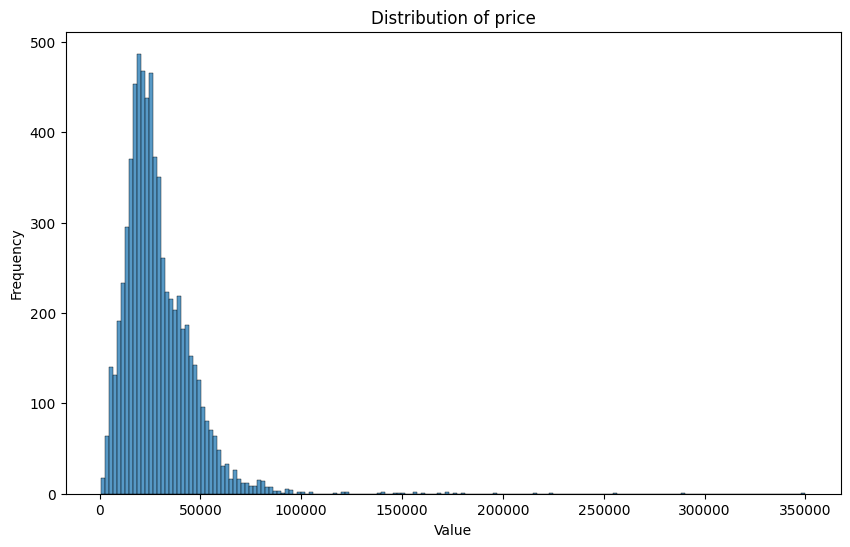

count      7000.000000
mean      28851.277693
std       17582.731720
min         650.000000
25%       17986.500000
50%       25387.000000
75%       36992.000000
max      350000.000000
Name: price, dtype: float64


In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'])
plt.title('Distribution of price')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
print(df['price'].describe())

These statistics on price distribution reflect market trends, product demand, and availibilities of certain vehicles. The average price of listed cars is approximately `$28851` which gives insight into typical range of car prices, so more regular priced vehicles are being advertised due to the higher availability of lower end cars. The 75th percentile is `$36992` which indicates that 75% of listed cars falls below this value, so typically regular priced cars are being listed over higher end; however, the presence of higher outliers reveals that there still are some high-end luxury cars being listed too. 

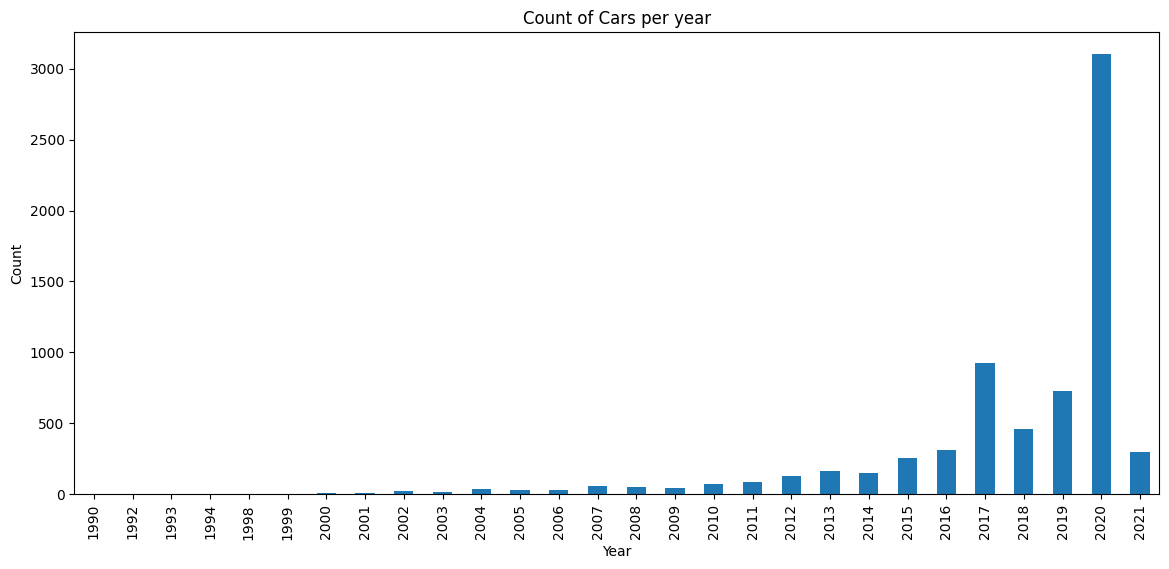

In [7]:
year_counts = df['year'].value_counts().sort_index() 

plt.figure(figsize=(14, 6))
year_counts.plot(kind='bar')
plt.title('Count of Cars per year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

There is a higher frequency of more recently manufactured cars being listed compared to older ones. Additionally, considering the price distribution graph, most of these later-made vehicles are priced cheaper which indicates that the year of manufacture may affect the price of a car's value. Moreover, the substantial increase in number of cars listed in 2020 compared to other years suggests several possible reasons:

* There is a high demand for cars manufactured in 2020.
* More people are trying to sell their car made in 2020.
* There was a major increase in car manufacturing in 2020 with more vehicles being created. 

In [8]:
print(df['is_new'].value_counts())

is_new
False    3728
True     3272
Name: count, dtype: int64


The split between new and old cars is fairly close.


---

## Task 2: Data Cleaning, Missing Observations and Feature Engineering
- In this task you need to follow a set of instructions/questions listed below.
- Make sure you explain each answer carefully both in Markdown text, as well as on your video.

**Total Marks: 12**

Student in charge of this task: `Tran Tuan Huy Bui`

In [33]:
class Cleaner:

    def __init__(self, df: pd.DataFrame):
        self.df = df.copy()


    def extract_numerical_values(self, features: list):
        for feature in features:
            self.df[feature] = self.df[feature].str.split().str[0]
            self.df[feature] = pd.to_numeric(self.df[feature], errors='coerce')
        #return self.df


    def extract_multiple_numerical_values(self, feature:str, value1:str, value2:str):
        '''
        Extracts two numerical values from a torque and power
        '''

        self.df[value1] = self.df[feature].str.extract(r'(\d+)', expand=False)\
                                        .apply(pd.to_numeric, errors='coerce')
                                        
        self.df[value2] = self.df[feature].str.extract(r'@\s*(\d+,?\d*)', expand=False)
        self.df[value2] = self.df[value2].str.replace(r',', '', regex=True)\
                                        .apply(pd.to_numeric, errors='coerce')

        del self.df[feature]


    def impute_numerical_columns(self, numerical_cols:list):
        self.df[numerical_cols] = self.df.loc[:, numerical_cols] \
                                    .fillna(self.df[numerical_cols].mean(axis=0))        


    def impute_categorical_columns(self, categorical_cols:list):
        self.df[categorical_cols] = self.df.loc[:, categorical_cols] \
                                    .fillna(self.df[categorical_cols].mode(axis=0).iloc[0])
    
    def check_most_frequent(self, df, feature: list, n: int, counts_show: bool):
        # Create a dataframe to check the most frequent values of each categorical feature
        most_fq_df = pd.DataFrame()

        for feat in feature:
            value_counts = df[feat].value_counts().head(n)

            top_values_df = value_counts.reset_index()

            if counts_show:
                top_values_df.columns = [feat, f'{feat}_count']
            else:
                del top_values_df['count']

            most_fq_df = pd.concat([most_fq_df, top_values_df], axis=1)

        print(most_fq_df.head(n))

    def check_most_frequent_color(self, color: list, insensitive_color: bool, n: int, counts_show: bool):
        colorFeat = ['exterior_color', 'interior_color', 'listing_color']
        # df_color = self.df[colorFeat].copy()

        for feat in colorFeat:
            self.df[feat] = self.df[feat].apply(lambda x: self.match_color(x, insensitive_color, color))

        self.check_most_frequent(self.df, colorFeat, n, counts_show)

    def match_color(self, observation, insensitive_color, color):
        # Convert the observation to lowercase for case-insensitive matching
        observation = str(observation).lower()

        # Initialize a set to store matched colors
        matched_colors = set()

        if insensitive_color:
            # Check for specific cases
            if 'silver' in observation or 'grey' in observation:
                matched_colors.add('gray')
            elif 'gold' in observation:
                matched_colors.add('yellow')

        # Check if any word in the observation matches a color
        for word in observation.split():
            if word in color:
                matched_colors.add(word)

        # If more than one color is matched, return 'other'
        if len(matched_colors) > 1:
            return 'other'
        # If only one color is matched, return that color
        elif len(matched_colors) == 1:
            return matched_colors.pop()
        # If no match is found, return 'other'
        else:
            return 'other'
    

train_cleaner = Cleaner(df)
test_cleaner = Cleaner(df_test)


**Task 2, Question 1**: Clean **all** numerical features so that they can be used in training algorithms. For instance, back_legroom feature is in object format containing both numerical values and text. Extract numerical values (equivalently eliminate the text) so that the numerical values can be used as a regular feature.  
(2 marks)

In [34]:
num_one_item_col = ['back_legroom','front_legroom', 
                  'fuel_tank_volume', 'height', 'length', 
                  'maximum_seating', 'wheelbase', 'width']

train_cleaner.extract_numerical_values(num_one_item_col)
test_cleaner.extract_numerical_values(num_one_item_col)                

`(Task 2, Question 1 Text Here - insert more cells as required)`

**Task 2, Question 2** Create at least 5 new features from the existing numerical variables which contain multiple items of information, for example you could extract maximum torque and torque rpm from the torque variable.  
(2 marks)

In [35]:
train_cleaner.extract_multiple_numerical_values('torque', 'max_torque', 'torque_rpm')
train_cleaner.extract_multiple_numerical_values('power', 'max_power', 'power_rpm')

test_cleaner.extract_multiple_numerical_values('torque', 'max_torque', 'torque_rpm')
test_cleaner.extract_multiple_numerical_values('power', 'max_power', 'power_rpm')


In [36]:
train_cleaner.df['car_age'] = 2024 - train_cleaner.df['year']

test_cleaner.df['car_age'] = 2024 - test_cleaner.df['year']

In [37]:
train_cleaner.df.drop(['year'], axis=1, inplace=True)

test_cleaner.df.drop(['year'], axis=1, inplace=True)

In [38]:
def time_extract(df, feat):
    listed_date_idx = df.columns.get_loc(feat)
    
    # Convert 'listed_date' column to datetime with mixed formats
    df[feat] = pd.to_datetime(df[feat], format='mixed', errors='coerce')
    
    # Insert 'listed_year' column next to 'listed_date'
    df.insert(listed_date_idx + 1, 'listed_year', df[feat].dt.year)

    # Insert 'listed_month' column after 'listed_year'
    df.insert(listed_date_idx + 2, 'listed_month', df[feat].dt.month)


time_extract(train_cleaner.df, 'listed_date')
time_extract(test_cleaner.df, 'listed_date')

`(Task 2, Question 2 Text Here - insert more cells as required)`

**Task 2, Question 3**: Impute the missing values for all features in both the training and test datasets.   
(3 marks)

In [15]:
## Task 2, Question 3 Code Here

In [39]:
numerical_cols = ['back_legroom', 'city_fuel_economy', 'daysonmarket', 'engine_displacement', 
                  'front_legroom', 'fuel_tank_volume', 'height', 'highway_fuel_economy', 'horsepower', 
                  'latitude', 'longitude', 'length', 'maximum_seating', 'mileage', 'savings_amount', 
                  'seller_rating', 'max_torque', 'torque_rpm', 'max_power', 'power_rpm', 'wheelbase', 'width']

train_cleaner.impute_numerical_columns(numerical_cols)

test_cleaner.impute_numerical_columns(numerical_cols)

In [40]:
categorical_cols = ['body_type', 'city', 'dealer_zip', 'engine_type', 'exterior_color', 'franchise_dealer', 'fuel_type',
                    'interior_color', 'is_new', 'listing_color', 'make_name', 'model_name', 'transmission', 'transmission_display', 'wheel_system']

train_cleaner.impute_categorical_columns(categorical_cols)

test_cleaner.impute_categorical_columns(categorical_cols)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_27932\472265513.py:36: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .fillna(self.df[categorical_cols].mode(axis=0).iloc[0])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_27932\472265513.py:36: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .fillna(self.df[categorical_cols].mode(axis=0).iloc[0])


`(Task 2, Question 3 Text Here - insert more cells as required)`

**Task 2, Question 4**: Encode all categorical variables appropriately as discussed in class. 

- Where multiple values are given for an observation encode the observation as 'other'. 
- Where a categorical feature contains more than 5 unique values, map the features into 5 most frequent values + 'other' and then encode appropriately. For instance, map colours into 5 basic colours + 'other': [red, yellow, green, blue, purple, other] and then encode.  
(2 marks)

In [41]:
# Define the list of colors
color = ('black', 'white', 'gray', 'red', 'yellow', 'green', 'blue', 'purple', 'other')
color_cols = ['exterior_color', 'interior_color', 'listing_color']
cat_without_color_cols = [col for col in categorical_cols if col not in color_cols]

In [42]:
train_cleaner.df['franchise_dealer'] = train_cleaner.df['franchise_dealer'].astype(int)
train_cleaner.df['is_new'] = train_cleaner.df['is_new'].astype(int)


test_cleaner.df['franchise_dealer'] = test_cleaner.df['franchise_dealer'].astype(int)
test_cleaner.df['is_new'] = test_cleaner.df['is_new'].astype(int)

feats_to_remove = ['franchise_dealer', 'is_new']
cat_without_bool_cols = [col for col in categorical_cols if col not in feats_to_remove]

In [43]:
common_feat = pd.DataFrame()

for feat in cat_without_bool_cols:
    train_counts = train_cleaner.df[feat].value_counts()
    test_counts = test_cleaner.df[feat].value_counts()

    common = train_counts.index.intersection(test_counts.index)

    common_counts = pd.DataFrame({'train_counts': train_counts[common],
                                   'test_counts': test_counts[common]})

    common_counts[f'{feat}_total_counts'] = common_counts['train_counts'] + common_counts['test_counts']
    common_counts = common_counts.sort_values(f'{feat}_total_counts', ascending=False)

    # Move the index to a new column 'column1' and reset the index to numbers
    common_counts = common_counts.reset_index().rename(columns={'index': 'column1'})

    # print(common_counts.head(6))
    # print('\n' * 3)
    
    # Get the first column of common_counts and store it in a new column named after the feature
    common_feat[feat] = common_counts[feat]

# common_feat.head(6)
# common_feat.info()

top_5_common_feat = common_feat.head(5)

In [44]:
no_color_cols = [col for col in cat_without_color_cols if col not in feats_to_remove]
# print(no_color_cols)

In [45]:
def modify_value(df):
    for feat in no_color_cols:
        df[feat] = df[feat].astype(str)
        top_5_common_feat.loc[:, feat] = top_5_common_feat[feat].astype(str)

        df[feat] = df[feat].\
                        str.lower().apply(lambda x: x if str(x) in top_5_common_feat[feat].\
                        str.lower().values else 'other')
        
        
    for feat in color_cols:
        df[feat] = df[feat].astype(str)
        top_5_common_feat.loc[:, feat] = top_5_common_feat[feat].astype(str)

        df[feat] = df[feat].\
                        str.lower().apply(lambda x: x if str(x) in top_5_common_feat[feat].\
                        str.lower().values else 'other')
        
    del df['vin']
    del df['listed_date']
        
    return df

train_cleaner.df = modify_value(train_cleaner.df)
test_cleaner.df = modify_value(test_cleaner.df)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_27932\564760190.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['77477' '43228' '33619' '32505' '77074']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  top_5_common_feat.loc[:, feat] = top_5_common_feat[feat].astype(str)


In [46]:
def encode(df, feats):
    for feat in feats:
        one_hot = pd.get_dummies(df[[feat]], dtype=int)
        # print(one_hot.head())

        df = df.join(one_hot)
        
        del df[feat]
        
    return df

train_encoded_df = encode(train_cleaner.df, cat_without_bool_cols)
test_encoded_df = encode(test_cleaner.df, cat_without_bool_cols)
train_encoded_df['fuel_type_other'] = np.zeros(train_encoded_df.shape[0]).astype(int)

`(Task 2, Question 4 Text Here - insert more cells as required)`

**Task 2, Question 5**: Perform any other actions you think need to be done on the data before constructing predictive models, and clearly explain what you have done.   
(1 marks)

In [47]:
# Function to categorize regions based on latitude and longitude
def categorize_region(lat):
    if lat > 42:  # Rough example for colder regions (e.g., Northern US, Canada)
        return 'cold'
    elif 35 <= lat <= 42:  # Example for central temperate regions (e.g., Midwestern US)
        return 'temperate'
    else:  # Warmer temperate regions (e.g., Southern US)
        return 'warm_temperate'

# Assess drive system suitability based on region
def assess_drive_system_suitability(row):
    if row['region'] == 'cold':
        return row['wheel_system_awd'] + row['wheel_system_4wd']  # Prefer AWD/4WD in cold regions
    elif row['region'] == 'temperate':
        return row['wheel_system_fwd'] + row['wheel_system_rwd']  # Prefer FWD/RWD in central temperate regions
    else:  # Warm temperate regions
        return row['wheel_system_fwd']  # Prefer FWD in warm temperate regions
    

def add_additional_features(df):

    # Performance Index
    df['performance_index'] = (df['horsepower'] + df['max_torque']) / df['engine_displacement']

    # Comfort Index
    df['comfort_index'] = (df['back_legroom'] + df['front_legroom'] + df['height'] + df['width']) / 4

    # Fuel Efficiency Score
    df['fuel_efficiency_score'] = (df['city_fuel_economy'] + df['highway_fuel_economy']) / 2

    # Seating Efficiency
    df['seating_efficiency'] = df['maximum_seating'] / (df['length'] * df['width'] * df['height'])

    # Resale Value Factor (assuming car age, make name, and body type influence this factor)
    df['resale_value_factor'] = df['car_age'] * df['make_name_other'] * df['body_type_suv / crossover']

    # Flag newly listed cars
    df['newly_listed'] = df['daysonmarket'].apply(lambda x: 1 if x <= 30 else 0)
        
    # Region category
    df['region'] = df.apply(lambda row: categorize_region(row['latitude']), axis=1)

    # Assess drive system suitability
    df['drive_system_suitability'] = df.apply(assess_drive_system_suitability, axis=1)

    df[['performance_index', 'comfort_index', 'fuel_efficiency_score','seating_efficiency', 'resale_value_factor', 'newly_listed', 'drive_system_suitability']].astype(float)
    

add_additional_features(train_encoded_df)
add_additional_features(test_encoded_df)

train_encoded_df = encode(train_encoded_df, ['region'])
test_encoded_df = encode(test_encoded_df, ['region'])


In [48]:
# Initialize and train the Random Forest Regressor
X = train_encoded_df.drop('price', axis=1)
y = train_encoded_df['price']

rf_regressor = RandomForestRegressor(n_estimators=200, max_depth=30, random_state=42)
rf_regressor.fit(X, y)

# Get feature importances
feature_importances = rf_regressor.feature_importances_

# Create a DataFrame for better visualization
feature_importances_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importances
})

# Sort the features by importance
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

# Display the sorted feature importances
print(feature_importances_df)

              feature    importance
22         max_torque  2.817138e-01
17            mileage  1.389965e-01
9          horsepower  1.201568e-01
26            car_age  1.186297e-01
24          max_power  6.106608e-02
..                ...           ...
85    model_name_trax  3.260486e-06
83   model_name_rogue  2.891782e-06
41   dealer_zip_43228  2.643192e-06
61   fuel_type_hybrid  3.966521e-07
101   fuel_type_other  0.000000e+00

[112 rows x 2 columns]


In [49]:
feature_importances_df['cumulative_importance'] = feature_importances_df['importance'].cumsum()

# Determine the threshold for cumulative importance
threshold = 0.975
rf_selected_features = feature_importances_df[feature_importances_df['cumulative_importance'] <= threshold]['feature']

# Display the selected features
print(f"Selected features (cumulative importance <= {threshold*100}%): {rf_selected_features.tolist()}")

Selected features (cumulative importance <= 97.5%): ['max_torque', 'mileage', 'horsepower', 'car_age', 'max_power', 'power_rpm', 'torque_rpm', 'height', 'seating_efficiency', 'length', 'fuel_tank_volume', 'wheelbase', 'width', 'performance_index', 'back_legroom', 'is_new', 'maximum_seating', 'comfort_index', 'longitude', 'latitude', 'fuel_efficiency_score', 'resale_value_factor', 'daysonmarket', 'seller_rating', 'savings_amount', 'front_legroom', 'wheel_system_fwd', 'engine_displacement', 'wheel_system_awd', 'highway_fuel_economy', 'city_fuel_economy', 'body_type_suv / crossover', 'make_name_other']


In [50]:
len(rf_selected_features)

33

`(Task 2, Question 5 Text Here - insert more cells as required)`

**Task 2, Question 6**: Perform some EDA to measure the relationship between the features and the target and carefully explain your findings. 
(2 marks)

In [ ]:
# pairplot of selected features

plotdf = train_encoded_df[rf_selected_features]
plotdf['price'] = train_encoded_df['price']

sns.pairplot(plotdf, corner=True)

Text(0.5, 1.0, 'Correlation Matrix')

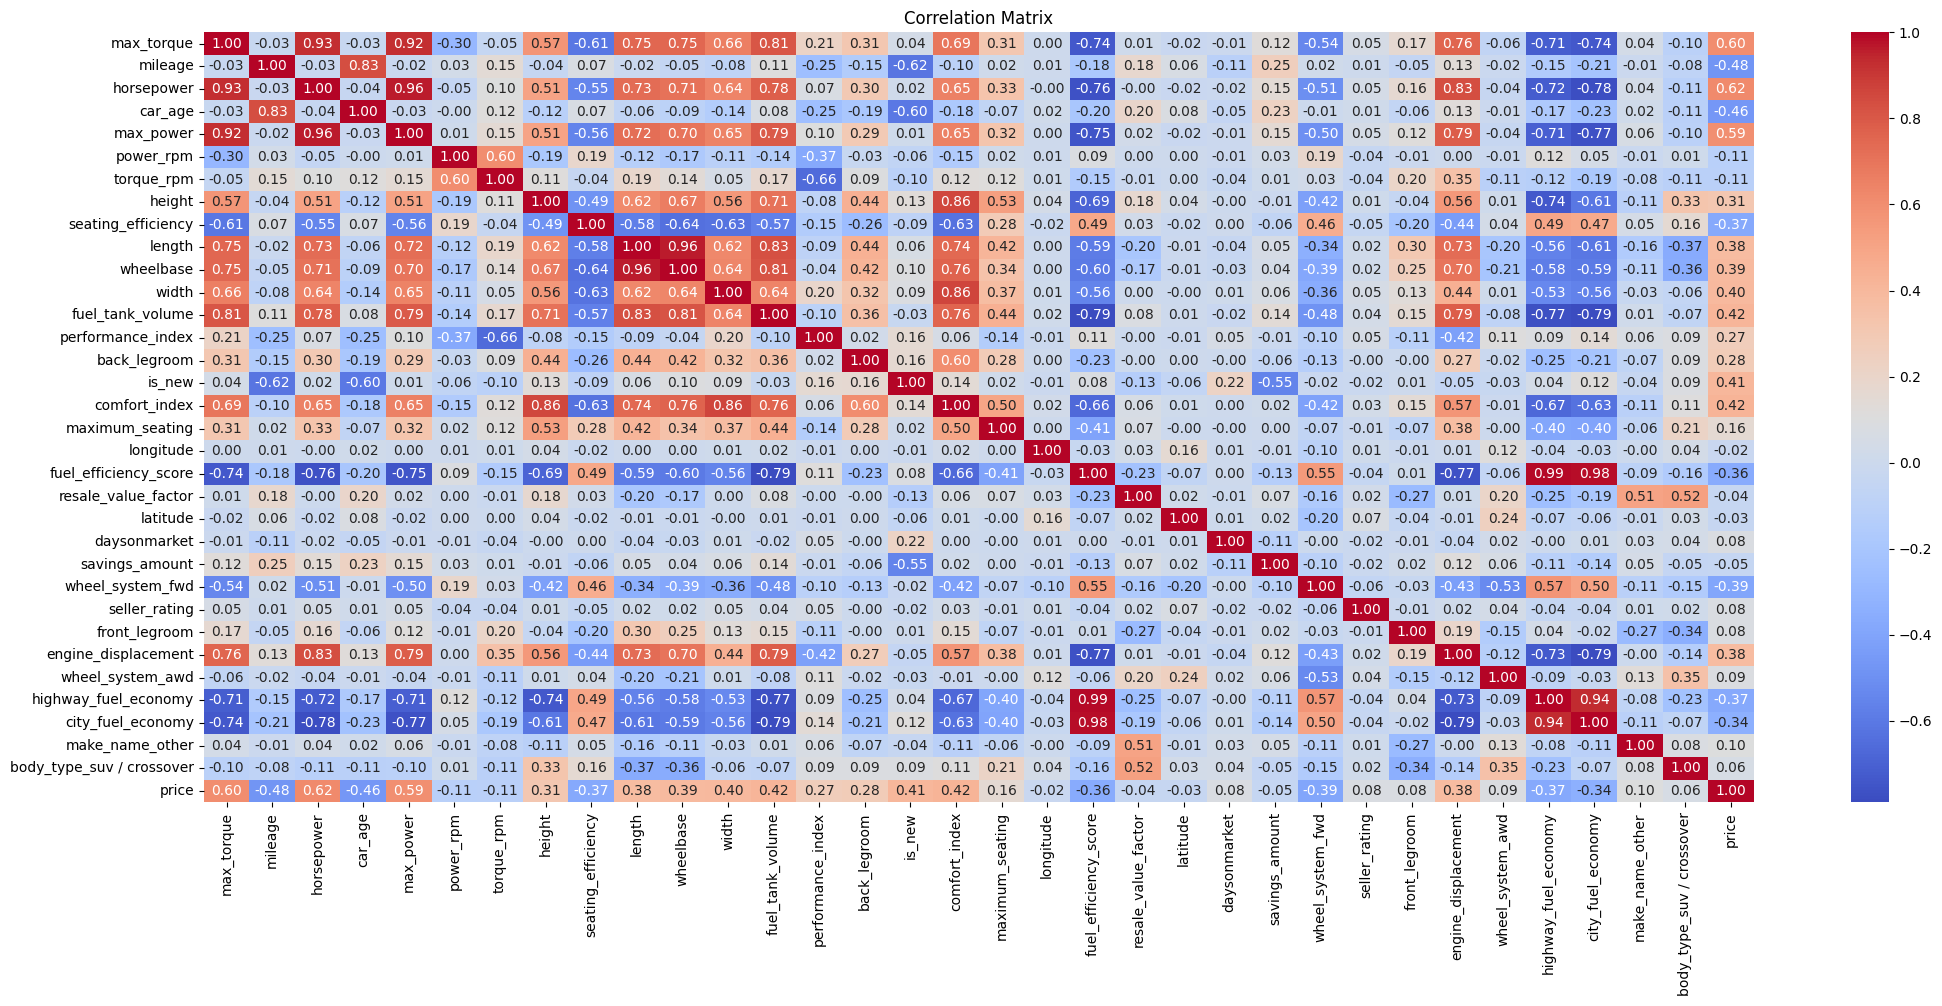

In [47]:
## Task 2, Question 6 Code Here

# print features which have correlation with price > 0.5
corr = plotdf.corr()
corr_price = corr['price']

# plot correlation matrix with price
plt.figure(figsize=(25, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')

# high_corr_features = corr_price[corr_price > abs(0.2)].index.to_list()
# high_corr_features.remove('price')
# print(high_corr_features)

`(Task 2, Question 6 Text Here - insert more cells as required)`

--- 
## Task 3: Fit and tune a forecasting model, submit predictions & win competition

Make sure you **clearly explain each step** you do both in Markdown and on the recoded video.   
*In this task you must not create any additional features and should only relly on the datasets constructed in Task 2.*

1. Build and explain at least 3 machine learning (ML) regression models taking into account the outcomes of Tasks 1 & 2 (3 marks)    
2. Fit the models and tune hyperparameters via cross-validation: make sure you comment and explain each step clearly (3 marks)   
3. Select your best algorithm, create predictions using the test dataset, and submit your predictions on Kaggle's competition page. Make sure you explain all the steps that led you to chose this algorithm both in the video presentation and in your written answer. (4 marks)   
4. Provide Kaggle ranking and score (screenshot your final submission) and comment (e.g. how could you improve your ranking?) (2 mark)   

- Hints:
    - To perform well you will need to iterate Tasks 2 and Task 3
    - Make sure your Python code works, so that a marker that can replicate your Kaggle submission and score.
    - You will receive the mark of zero if your code does not produce the forecasts uploaded to Kaggle 

**Total Marks: 12**

Student in charge of this task: `Chau Anh Cong`

In [56]:
df_train = train_encoded_df.copy()

In [57]:
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

### Testing models

In [58]:
mlflow.set_experiment("Group Assignment")

<Experiment: artifact_location='file:///D:/Projects/BUSA3020/GroupAssignment/mlruns/1', creation_time=1716241476137, experiment_id='1', last_update_time=1716269426879, lifecycle_stage='active', name='Group Assignment', tags={}>

## Linear Models

In [60]:
y = df_train['price']
X = df_train[rf_selected_features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [53]:
with mlflow.start_run(run_name="Linear Regression"):

    # Train a model
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    predictions = model.predict(X_test_scaled)
    
    # Log model
    mlflow.sklearn.log_model(model, "linear_model")
    
    # Log metrics
    mape = mean_absolute_percentage_error(y_test, predictions)
    mlflow.log_metric("mape", mape)


d:\Anaconda\envs\BUSA3020\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Anaconda\envs\BUSA3020\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [62]:
with mlflow.start_run(run_name="Ridge Regression"):

    # Train a model
    model = RidgeCV(alphas=np.logspace(-4, 1, 50))
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    predictions = model.predict(X_test_scaled)
    
    # Log model
    mlflow.sklearn.log_model(model, "ridge_model")
    
    # Log metrics
    mape = mean_absolute_percentage_error(y_test, predictions)
    mlflow.log_metric("mape", mape)
    
    alpha = model.alpha_
    # Log parameters
    mlflow.log_param("alpha", alpha)

d:\Anaconda\envs\BUSA3020\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Anaconda\envs\BUSA3020\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [61]:
with mlflow.start_run(run_name="Lasso Regression"):

    # Train a model
    model = LassoCV(alphas=np.logspace(-4, 1, 50))
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    predictions = model.predict(X_test_scaled)
    
    # Log model
    mlflow.sklearn.log_model(model, "lasso_model")
    
    # Log metrics
    mape = mean_absolute_percentage_error(y_test, predictions)
    mlflow.log_metric("mape", mape)
    
    alpha = model.alpha_
    # Log parameters
    mlflow.log_param("alpha", alpha)

d:\Anaconda\envs\BUSA3020\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.376e+10, tolerance: 1.615e+08
  model = cd_fast.enet_coordinate_descent(
d:\Anaconda\envs\BUSA3020\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Anaconda\envs\BUSA3020\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools i

## Non-linear Models

### SVR

In [ ]:
with mlflow.start_run(run_name="SVR Regression"):

    y = df_train['price']
    X = df_train[rf_selected_features]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    param_grid = {
        'C': [0.1, 1],
        'kernel': ['rbf'],
        'gamma': [0.001, 0.01],
    }

    # Initialize the SVR
    svr = SVR()

    # Initialize the RandomizedSearchCV
    random_search = RandomizedSearchCV(estimator=svr, param_distributions=param_grid, 
                                        cv=5, refit=True, random_state=42, n_jobs=-1)

    # Fit the model
    random_search.fit(X_train, y_train)

    # Get the best parameters
    model = random_search.best_estimator_

    # Make predictions
    predictions = model.predict(X_test)
    
    # Log model
    mlflow.sklearn.log_model(model, "svr_model")
    
    # Log metrics
    mape = mean_absolute_percentage_error(y_test, predictions)
    mlflow.log_metric("mape", mape)
    
    params = random_search.best_params_

    # Log parameters
    mlflow.log_param('C', params['C'])
    mlflow.log_param('kernel', params['kernel'])
    mlflow.log_param('gamma', params['gamma'])

### Random Forest Regressor

In [ ]:
with mlflow.start_run(run_name="Random Forest Regression"):

    y = df_train['price']
    X = df_train[rf_selected_features]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    param_grid = {
        'n_estimators': [100, 200, 500, 1000],
        'max_depth': [10, 20, 30, 40, 50],
    }

    # Initialize the Random Forest Regressor
    rf = RandomForestRegressor(random_state=42)

    # Initialize the RandomizedSearchCV
    random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, 
                                        cv=5, refit=True, random_state=42, n_jobs=-1)

    # Fit the model
    random_search.fit(X_train, y_train)

    # Get the best parameters
    model = random_search.best_estimator_

    # Make predictions
    predictions = model.predict(X_test)
    
    # Log model
    mlflow.sklearn.log_model(model, "random_forest_model")
    
    # Log metrics
    mape = mean_absolute_percentage_error(y_test, predictions)
    mlflow.log_metric("mape", mape)
    
    params = random_search.best_params_
    # Log parameters
    mlflow.log_param('n_estimators', params['n_estimators'])
    mlflow.log_param('max_depth', params['max_depth'])

d:\Anaconda\envs\BUSA3020\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Anaconda\envs\BUSA3020\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


### XGBRegressor

In [59]:
with mlflow.start_run(run_name="XGBoost Regression"):
    y = df_train['price']
    X = df_train[rf_selected_features]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    param_grid = {
        'n_estimators': [100, 200, 500, 1000],
        'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
        'max_depth': [3, 5, 7, 10]
    }

    # Initialize the XGBoost Regressor
    xg_reg = XGBRegressor(random_state=42)

    # Initialize the RandomizedSearchCV
    random_search = RandomizedSearchCV(estimator=xg_reg, param_distributions=param_grid, 
                                        cv=5, scoring=mape_scorer, refit=True, random_state=42, n_jobs=-1)

    # Fit the model
    random_search.fit(X_train, y_train)

    # Get the best parameters
    model = random_search.best_estimator_

    # Make predictions
    predictions = model.predict(X_test)
    
    # Log model
    mlflow.sklearn.log_model(model, "xgboost_model")
    
    # Log metrics
    mape = mean_absolute_percentage_error(y_test, predictions)
    mlflow.log_metric("mape", mape)
    
    params = random_search.best_params_
    # Log parameters
    mlflow.log_param('n_estimators', params['n_estimators'])
    mlflow.log_param('learning_rate', params['learning_rate'])
    mlflow.log_param('max_depth', params['max_depth'])


In [60]:
from sklearn.compose import TransformedTargetRegressor

with mlflow.start_run(run_name="XGBoost Log"):

    y = df_train['price']
    X = df_train[rf_selected_features]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
      
    # Initialize CatBoostRegressor with TransformedTargetRegressor
    log_regressor = TransformedTargetRegressor(
        regressor=XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=5, random_state=42),
        func=np.log1p,
        inverse_func=np.expm1
    )

    # Perform cross-validation
    cv_scores = cross_val_score(log_regressor, X_train, y_train, cv=5, scoring=mape_scorer)

    # Fit the model on the entire training data
    log_regressor.fit(X_train, y_train)

    
    # Predict on the test set
    predictions = log_regressor.predict(X_test)
    
    # Calculate MAPE
    mape = mean_absolute_percentage_error(y_test, predictions)
    
   # Log model
    mlflow.sklearn.log_model(log_regressor, "log_model")
    
    # Log metrics
    mape = mean_absolute_percentage_error(y_test, predictions)
    mlflow.log_metric("mape", mape)
    

d:\Anaconda\envs\BUSA3020\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Anaconda\envs\BUSA3020\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


### LightGBM

In [61]:
# Track the experiment with MLflow
with mlflow.start_run(run_name="LightGBM Regression"):

    y = df_train['price']
    X = df_train[rf_selected_features]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize CatBoostRegressor
    lgbm_regressor = LGBMRegressor(random_state=42)

    # Define a parameter grid for hyperparameter tuning
    param_grid = {
        'learning_rate': [0.2, 0.25, 0.3],
        'max_depth': [5, 8, 10],
        'num_leaves': [45, 50, 55],
        'lambda_l1': [1, 1.2, 1.3],
        'num_iterations': [1500, 2000, 2500],
        'boosting_type': ['dart'],
        'verbosity': [-1]
    }
    # Initialize the RandomizedSearchCV
    random_search = RandomizedSearchCV(estimator=lgbm_regressor, param_distributions=param_grid, 
                                        cv=5, scoring=mape_scorer, refit=True, random_state=42, n_jobs=-1)
    

    # Train the model using GridSearchCV
    random_search.fit(X_train, y_train)

    # Get the best model and parameters
    model = random_search.best_estimator_
    params = random_search.best_params_

    # Predict on the test set
    predictions = model.predict(X_test)
    
    # Calculate MAPE
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
   # Log model
    mlflow.sklearn.log_model(model, "lgbm_model")
    
    # Log metrics
    mape = mean_absolute_percentage_error(y_test, predictions)
    mlflow.log_metric("mape", mape)
    

    # Log parameters
    mlflow.log_param('learning_rate', params['learning_rate'])
    mlflow.log_param('max_depth', params['max_depth'])
    mlflow.log_param('num_leaves', params['num_leaves'])
    mlflow.log_param('lambda_l1', params['lambda_l1'])
    mlflow.log_param('num_iterations', params['num_iterations'])
    mlflow.log_param('boosting_type', params['boosting_type'])
    mlflow.log_param('verbosity', params['verbosity'])

KeyboardInterrupt: 

# CatBoost

In [82]:
# Track the experiment with MLflow
with mlflow.start_run(run_name="CatBoost Regression"):

    y = df_train['price']
    X = df_train[rf_selected_features]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize CatBoostRegressor
    cb_regressor = CatBoostRegressor(iterations=200, verbose=0, random_state=42, loss_function='MAPE')

    # Define a parameter grid for hyperparameter tuning
    param_grid = {
        
        'depth': [12, 15, 20],
        'learning_rate': [0.2, 0.25, 0.3],
        'l2_leaf_reg': [6, 6.5, 7]
    }

    # Initialize the RandomizedSearchCV
    random_search = RandomizedSearchCV(estimator=cb_regressor, param_distributions=param_grid, 
                                        cv=5, scoring=mape_scorer, refit=True, random_state=42, n_jobs=-1)
    

    # Train the model using GridSearchCV
    random_search.fit(X_train, y_train)

    # Get the best model and parameters
    model = random_search.best_estimator_
    params = random_search.best_params_

    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate MAPE
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
   # Log model
    mlflow.sklearn.log_model(model, "cat_model")
    
    # Log metrics
    mape = mean_absolute_percentage_error(y_test, predictions)
    mlflow.log_metric("mape", mape)
    

    # Log parameters
    mlflow.log_param('depth', params['depth'])
    mlflow.log_param('learning_rate', params['learning_rate'])
    mlflow.log_param('l2_leaf_reg', params['l2_leaf_reg'])

In [ ]:
from sklearn.compose import TransformedTargetRegressor

with mlflow.start_run(run_name="CatBoost Log"):

    y = train_encoded_df['price']
    X = train_encoded_df[rf_selected_features]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
      
    # Initialize CatBoostRegressor with TransformedTargetRegressor
    log_regressor = TransformedTargetRegressor(
        regressor=CatBoostRegressor(loss_function='MAPE', verbose=0, iterations=1200, random_state=42),
        func=np.log1p,
        inverse_func=np.expm1
    )

    # Perform cross-validation
    cv_scores = cross_val_score(log_regressor, X_train, y_train, cv=5, scoring=mape_scorer)

    # Fit the model on the entire training data
    log_regressor.fit(X_train, y_train)

    
    # Predict on the test set
    y_pred = log_regressor.predict(X_test)
    
    # Calculate MAPE
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
   # Log model
    mlflow.sklearn.log_model(log_regressor, "log_model")
    
    # Log metrics
    mape = mean_absolute_percentage_error(y_test, predictions)
    mlflow.log_metric("mape", mape)
    

# Stacking

In [110]:
import mlflow.sklearn

lgb = mlflow.sklearn.load_model('runs:/0fa75dd0d8df49949be2699141220175/lgbm_model')
xgb = mlflow.sklearn.load_model('runs:/46bd42be8e8b4f9387513e2e1eca5246/log_model')

In [111]:
lgb_params = lgb.get_params()
xgb_params = xgb.get_params()
mlp_params = mlp.get_params()
lgb_params, xgb_params

({'boosting_type': 'dart',
  'class_weight': None,
  'colsample_bytree': 1.0,
  'importance_type': 'split',
  'learning_rate': 0.25,
  'max_depth': 5,
  'min_child_samples': 20,
  'min_child_weight': 0.001,
  'min_split_gain': 0.0,
  'n_estimators': 100,
  'n_jobs': None,
  'num_leaves': 55,
  'objective': None,
  'random_state': 42,
  'reg_alpha': 0.0,
  'reg_lambda': 0.0,
  'subsample': 1.0,
  'subsample_for_bin': 200000,
  'subsample_freq': 0,
  'verbosity': -1,
  'num_iterations': 2000,
  'lambda_l1': 1.2},
 {'check_inverse': True,
  'func': <ufunc 'log1p'>,
  'inverse_func': <ufunc 'expm1'>,
  'regressor__objective': 'reg:squarederror',
  'regressor__base_score': None,
  'regressor__booster': None,
  'regressor__callbacks': None,
  'regressor__colsample_bylevel': None,
  'regressor__colsample_bynode': None,
  'regressor__colsample_bytree': None,
  'regressor__device': None,
  'regressor__early_stopping_rounds': None,
  'regressor__enable_categorical': False,
  'regressor__eval_met

In [112]:
with mlflow.start_run(run_name="Stack Boost Regression"):

    y = df_train['price']
    X = df_train[rf_selected_features]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define estimators with tuned parameters
    estimators = [
        ('lgbm', LGBMRegressor(**lgb_params)),
        ('xgb', XGBRegressor(**xgb_params)),
        # ('cat', CatBoostRegressor(**param_cat)),
        #('mlp', MLPRegressor())  # without tuning
    ]

    linear_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('lasso', LassoCV(alphas=np.logspace(-4, 1, 10), cv=5))
    ])

    # Create the stacking regressor
    stack = StackingRegressor(
        estimators=estimators,
        final_estimator=linear_pipeline,
        n_jobs=-1,
        cv=5)

    stack.fit(X_train, y_train)

    # Predict on the test set
    predictions = stack.predict(X_test)

    # Calculate MAPE
    mape = mean_absolute_percentage_error(y_test, predictions)
    
    # Log model
    mlflow.sklearn.log_model(stack, "stack_model")
    
    # Log metrics
    mlflow.log_metric("mape", mape)

    # Log best parameters
    #mlflow.log_params('lasso', best_params)

    

d:\Anaconda\envs\BUSA3020\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Anaconda\envs\BUSA3020\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


# Submission

In [28]:
logged_model = 'runs:/87dadba56b2547368fb4b0331707ff18/stack_model'

# Load model 
model = mlflow.sklearn.load_model(logged_model)

In [154]:
model.named_estimators_

{'lgbm': LGBMRegressor(boosting_type='dart', lambda_l1=1.3, learning_rate=0.2,
               max_depth=5, num_iterations=2000, num_leaves=50, random_state=42,
               verbosity=-1),
 'xgbr': TransformedTargetRegressor(func=<ufunc 'log1p'>, inverse_func=<ufunc 'expm1'>,
                            regressor=XGBRegressor(base_score=None, booster=None,
                                                   callbacks=None,
                                                   colsample_bylevel=None,
                                                   colsample_bynode=None,
                                                   colsample_bytree=None,
                                                   device=None,
                                                   early_stopping_rounds=None,
                                                   enable_categorical=False,
                                                   eval_metric=None,
                                                   feature_ty

In [ ]:
# test_cleaner = Cleaner(df_test)

# test_cleaner.extract_numerical_values(num_one_item_col)
# test_cleaner.extract_multiple_numerical_values('torque', 'max_torque', 'torque_rpm')
# test_cleaner.extract_multiple_numerical_values('power', 'max_power', 'power_rpm')
# test_cleaner.df['car_age'] = 2024 - test_cleaner.df['year']
# test_cleaner.impute_numerical_columns(numerical_cols)
# test_cleaner.impute_categorical_columns(categorical_cols)

In [51]:
df_submit = test_encoded_df[rf_selected_features].copy().values

In [52]:
df_submit.shape

(3000, 33)

In [53]:
# transform the prediction to the original scale
# from train_encoded_df.price = np.log(train_encoded_df.price)

predictions = model.predict(df_submit)

d:\Anaconda\envs\BUSA3020\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


In [54]:
output = pd.DataFrame({"vin": df_test['vin'].values, "price": predictions})
output

,vin,price
0,5J8YD4H05LL032532,56127.552508
1,KNAE45LC8K6050784,56111.173488
2,5XYZGDABXCG149606,11975.348717
3,1G1ZE5ST6HF197903,19329.540939
4,KL4MMDSL6LB106699,39610.584523
...,...,...
2995,1G1BC5SM6H7144984,23765.967213
2996,WBXYH9C03L5R77266,49560.766831
2997,1C6RRFFG4KN799234,41645.000294
2998,1FTEW1E44LKD86114,60616.112913


In [55]:
output.to_csv('output.csv', index=False)

---
---
## Marking Criteria

To receive full marks your solutions must satisfy the following criteria:

- Problem Description: 12 marks
- Data Cleaning: 12 marks
- Building Forecasting models: 12 marks
- Competition Points: 4 marks
- Forecasts correctly uploaded to Kaggle
- Python code is clean and concise
- Written explanations are provided in clear and easy to understand sentences
- Video presentations are limited to 15 minutes in duration
- Each team member delivers a 5-minute presentation on their assigned task
    - During the video recording, make sure that both your face and Jupyter Notebook are clearly visible
    - Your code must be readable on the video
    - Discuss both the actions you took and, more importantly, the reasoning behind these actions, explaining the significance of key steps
- The assignment notebook is well-organised and easy to follow
- Failure to meet the above marking criteria will result in a deduction of marks

---
---